In [ ]:
!pip install umap-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, precision_recall_fscore_support
from scipy.cluster.hierarchy import dendrogram, linkage
# Import UMAP from umap.umap_ instead of umap directly
from umap import UMAP


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
url = '/content/canada_data.csv'
data = pd.read_csv(url)


In [ ]:
# Statistiques descriptives
print(data.describe())




           tweet_id       user_id  valence_intensity  fear_intensity  \
count  2.452290e+05  2.452290e+05      245229.000000   245229.000000   
mean   1.235706e+18  2.512450e+17           0.453497        0.457851   
std    4.469330e+15  4.376449e+17           0.086606        0.098186   
min    1.221960e+18  8.610000e+02           0.042000       -0.007000   
25%    1.234628e+18  6.970270e+07           0.395000        0.390000   
50%    1.237837e+18  4.753089e+08           0.454000        0.459000   
75%    1.238532e+18  7.119141e+17           0.512000        0.524000   
max    1.239412e+18  1.239372e+18           0.956000        1.013000   

       anger_intensity  happiness_intensity  sadness_intensity  
count    245229.000000        245229.000000      245229.000000  
mean          0.434622             0.299493           0.412897  
std           0.080520             0.085424           0.073948  
min           0.091000            -0.012000           0.079000  
25%           0.380000    

In [ ]:
# Importer les bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns


In [ ]:
features = data[['valence_intensity',  'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']]

In [ ]:
features

,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity
0,0.409,0.468,0.530,0.255,0.462
1,0.464,0.604,0.428,0.310,0.448
2,0.336,0.574,0.545,0.186,0.473
3,0.501,0.473,0.366,0.294,0.367
4,0.394,0.633,0.470,0.326,0.470
...,...,...,...,...,...
245224,0.375,0.542,0.538,0.259,0.488
245225,0.426,0.435,0.446,0.291,0.394
245226,0.608,0.380,0.378,0.457,0.370
245227,0.538,0.228,0.307,0.375,0.322


In [ ]:
# Normaliser les données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)


In [ ]:
# Réduction de dimension avec UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(normalized_data)

# Vérifier les dimensions réduites
print(umap_embedding.shape)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(245229, 2)


In [ ]:
# Initialiser une liste pour les résultats
cluster_results = {}

# Boucle sur les valeurs de K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    cluster_results[k] = clusters


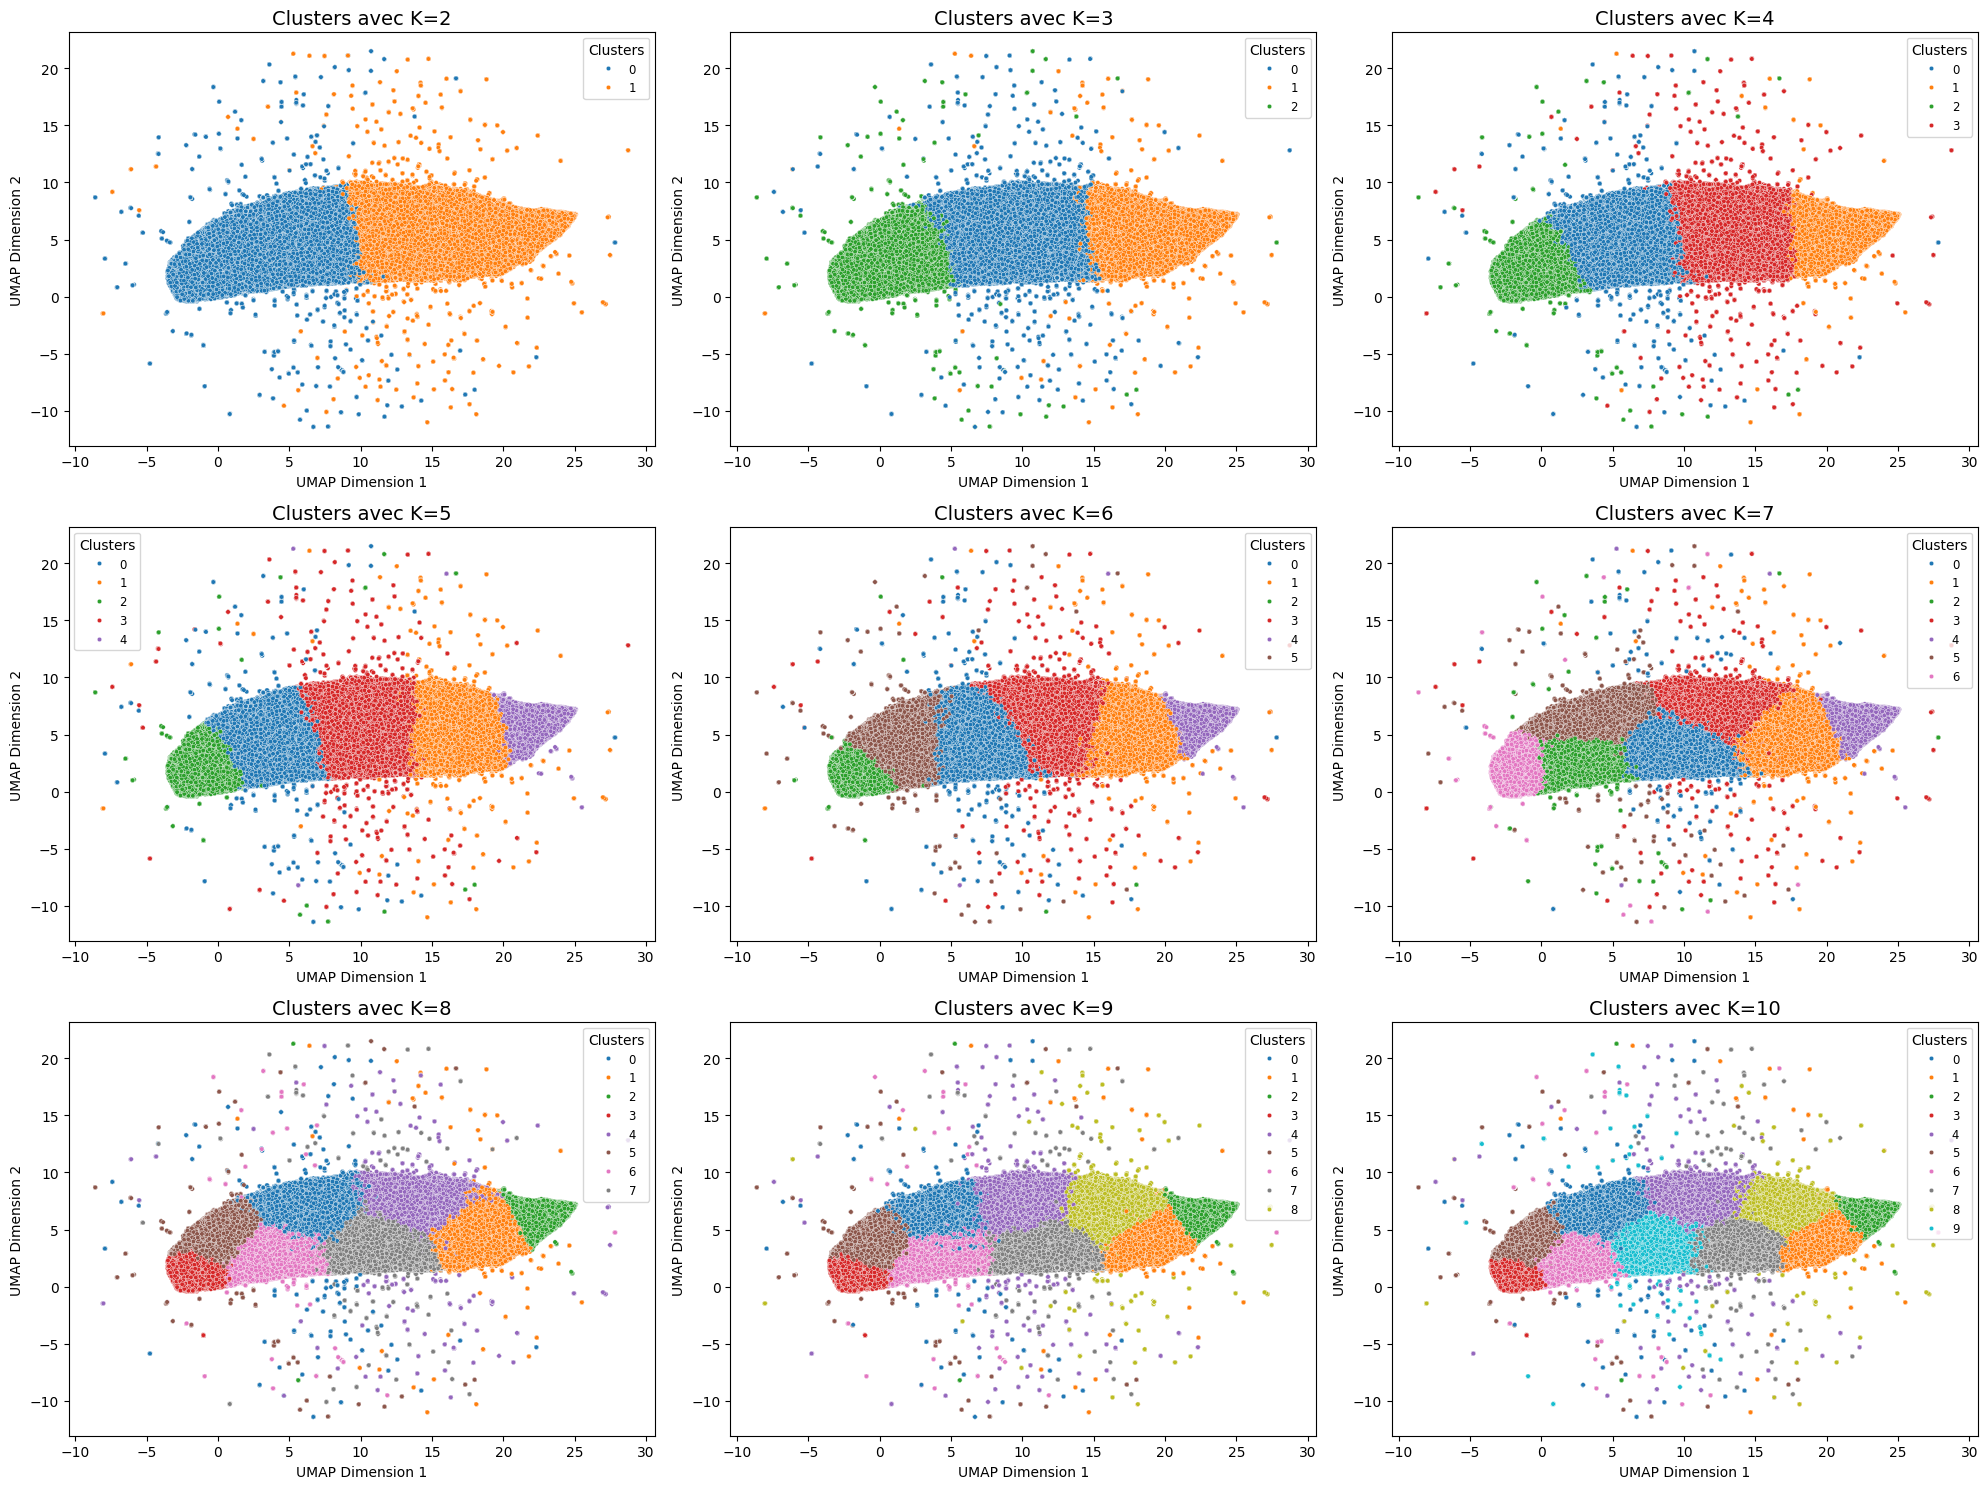

In [ ]:
# Configurer les plots
plt.figure(figsize=(20, 15))

for idx, k in enumerate(range(2, 11), 1):
    plt.subplot(3, 3, idx)  # Créer une grille 3x3
    sns.scatterplot(
        x=umap_embedding[:, 0], y=umap_embedding[:, 1],
        hue=cluster_results[k], palette='tab10', s=10
    )
    plt.title(f'Clusters avec K={k}', fontsize=14)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(title='Clusters', loc='best', fontsize='small')

plt.tight_layout()
plt.show()


In [ ]:
# Sauvegarder chaque visualisation dans un fichier PNG
for k in range(2, 11):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=umap_embedding[:, 0], y=umap_embedding[:, 1],
        hue=cluster_results[k], palette='tab10', s=10
    )
    plt.title(f'Clusters avec K={k}', fontsize=14)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(title='Clusters', loc='best', fontsize='small')
    plt.savefig(f'clusters_k_{k}.png')  # Sauvegarder en PNG
    plt.close()  # Fermer le graphique pour économiser de la mémoire


In [ ]:
import shutil

# Créer une archive ZIP contenant tous les fichiers PNG
shutil.make_archive('clusters_visualisations', 'zip', '.', './')


'/content/clusters_visualisations.zip'

Silhouette Score pour k=2: 0.4010065270675966
Silhouette Score pour k=3: 0.310519725711398
Silhouette Score pour k=4: 0.25646331893293794
Silhouette Score pour k=5: 0.22524270612676137
Silhouette Score pour k=6: 0.19282707590891543
Silhouette Score pour k=7: 0.2011299102129964
Silhouette Score pour k=8: 0.1991947111760246
Silhouette Score pour k=9: 0.18162597871333228
Silhouette Score pour k=10: 0.18683509987926103


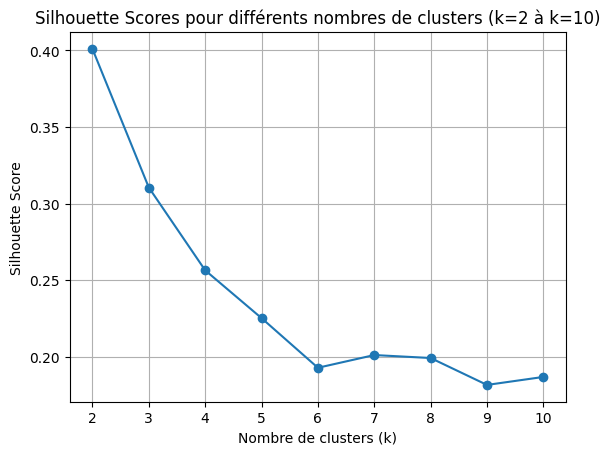

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assurez-vous que les données sont dans un format de tableau numpy
data = features  # Cette variable fait référence à vos données d'entrée (assurez-vous qu'elles sont au bon format)

# Normalisation des données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Initialisation d'une liste pour stocker les résultats du Silhouette Score
silhouette_scores = []

# Boucle sur les valeurs de k de 2 à 10
for k in range(2, 11):
    # Appliquer KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)

    # Calcul du score silhouette
    silhouette_avg = silhouette_score(normalized_data, clusters)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score pour k={k}: {silhouette_avg}")

# Optionnel : afficher les scores dans un graphique pour mieux visualiser l'évolution
import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores pour différents nombres de clusters (k=2 à k=10)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
